#  Course 1 : Foundation of Information

**Project Part A** - Job Market Analysis : Analysis of job market data to explore the open positions related to the jobs in the field of data or machine learning in a particular region

**Objectives & Assignment Description:**

Collect and use job market data to explore data related positions or machine learning related positions in a particular region (e.g., US, India). Suggested websites for this assignment are:
- Indeed
- Glassdoor
- Naukri
- Monster

You will have to use appropriate keywords (for e.g., “data scientist”, “data engineer”, “ML engineer”) to extract information on the positions available on websites of your choice.
While it is not compulsory to do so, you could use web scraping techniques introduced in this course to collect data from these websites. Also, note that you are not limited to the sites mentioned above. Identity one job that you aspire to transition into and identify the skills required for the job

Note: Any one of the recommended websites can be used to extract data. Or you can select any job-related website of your choosing. You may select 1 keyword of your choice. Create a professional report in a word document that is 2 to 4 pages long by extracting the necessary information. Submit it in PDF format. Submissions do not need to include a code file. 

Please make sure to use Web scraping technique for data extraction.

In [12]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException


# Provide the base URL for data scientist jobs
base_url = "https://www.naukri.com/data-scientist-jobs?k=data%20scientist&nignbevent_src=jobsearchDeskGNB"

# Initialize the Chrome WebDriver
browser = webdriver.Chrome()

# List to store job data
job_data_list = []

# Loop through the first 7 pages
for page_number in range(1, 21):
    # Create the URL for the current page
    url = f"{base_url}&page={page_number}"

    # Open the URL in the browser
    browser.get(url)

    # Wait for job cards to be present on the page
    try:
        WebDriverWait(browser, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, '.cust-job-tuple.layout-wrapper.lay-2.sjw__tuple')))
    except Exception as e:
        print(f"Error waiting for job cards on page {page_number}: {e}")
        continue

    # Find all job cards on the page
    job_cards = browser.find_elements(By.CSS_SELECTOR, '.cust-job-tuple.layout-wrapper.lay-2.sjw__tuple')

    # Loop through each job card and extract relevant information
    for card in job_cards:
        data = {
            'Title': '',
            'Company': '',
            'Rating': '',
            'Experience Needed': '',
            'Salary': '',
            'Location': '',
            'Description': '',
            'Required Skills': []
        }

        # Extract information from job card
        try:
            data['Title'] = card.find_element(By.CLASS_NAME, 'title').text
        except NoSuchElementException:
            pass

        try:
            data['Company'] = card.find_element(By.CLASS_NAME, 'comp-name').text
        except NoSuchElementException:
            pass

        try:
            data['Rating'] = card.find_element(By.CLASS_NAME, 'main-2').text
        except NoSuchElementException:
            pass

        try:
            data['Experience Needed'] = card.find_element(By.CLASS_NAME, 'expwdth').text
        except NoSuchElementException:
            pass

        try:
            data['Salary'] = card.find_element(By.CLASS_NAME, 'sal').text
        except NoSuchElementException:
            pass

        try:
            data['Location'] = card.find_element(By.CLASS_NAME, 'locWdth').text
        except NoSuchElementException:
            pass

        try:
            data['Description'] = card.find_element(By.CLASS_NAME, 'job-desc').text
        except NoSuchElementException:
            pass

        # Extract required skills if available
        try:
            skills_element = card.find_element(By.CLASS_NAME, 'tags-gt')
            data['Required Skills'] = [skill.text for skill in skills_element.find_elements(By.CLASS_NAME, 'tag-li')]
        except NoSuchElementException:
            pass

        # Append the data to the list
        job_data_list.append(data)

# Close the browser
browser.quit()

# Create a Pandas DataFrame from the list of job data
df = pd.DataFrame(job_data_list)

# Save the DataFrame to an Excel file
# Save the DataFrame to a CSV file
df.to_csv("Job_Database.csv", index=False)

In [14]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("Job_Database.csv")

# Display the initial state of the DataFrame
print("Initial DataFrame:")
print(df.head())

# Data Cleaning

# Convert 'Salary' column to a consistent format
def normalize_salary(salary_str):
    if pd.isnull(salary_str):
        return None
    elif 'Not disclosed' in salary_str or 'Unpaid' in salary_str:
        return None
    else:
        range_str = salary_str.replace('Lacs PA', '').replace('PA', '').strip()

        if '-' in range_str:
            lower, upper = map(str.strip, range_str.split('-'))

            if lower.isnumeric() and upper.isnumeric():
                lower_value = float(lower.replace(',', '')) / 100000 if ',' in lower else float(lower)
                upper_value = float(upper.replace(',', '')) / 100000 if ',' in upper else float(upper)

                range_values = [lower_value, upper_value]
            else:
                return None
        else:
            if range_str.isnumeric():
                range_values = [float(range_str.replace(',', '')), None]
            else:
                return None

        return '-'.join(map(str, range_values))

df['Normalized Salary'] = df['Salary'].apply(normalize_salary)

# Display the cleaned DataFrame with relevant columns
print("\nCleaned DataFrame:")
display(df[['Title', 'Company', 'Rating', 'Experience Needed', 'Normalized Salary', 'Location', 'Description', 'Required Skills']].head())

# Save the cleaned DataFrame to a new CSV file
df.to_csv("Cleaned_Job_Database.csv", index=False)

Initial DataFrame:
                                     Title                   Company  Rating  \
0    Data Scientist/ Senior Data Scientist         Fractal Analytics     4.0   
1               Experienced Data Scientist  Volvo Financial Services     4.6   
2         Data Scientist - Knowledge Graph                     Capco     3.7   
3  Data Scientist - Reinforcement learning                     Wipro     3.8   
4                     AI/ML Data Scientist                      Ford     4.4   

  Experience Needed         Salary  \
0           4-9 Yrs  Not disclosed   
1           3-8 Yrs  Not disclosed   
2          8-13 Yrs  Not disclosed   
3          5-10 Yrs  Not disclosed   
4          6-10 Yrs  Not disclosed   

                                            Location  \
0  Mumbai, Pune, Chennai, Gurgaon/Gurugram, Banga...   
1  Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...   
2  Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...   
3                                    Pune, Beng

,Title,Company,Rating,Experience Needed,Normalized Salary,Location,Description,Required Skills
0,Data Scientist/ Senior Data Scientist,Fractal Analytics,4.0,4-9 Yrs,None,"Mumbai, Pune, Chennai, Gurgaon/Gurugram, Banga...",Demonstrate excellent communication skills and...,"['Computer science', 'GIT', 'GCP', 'Analytical..."
1,Experienced Data Scientist,Volvo Financial Services,4.6,3-8 Yrs,None,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",You will work in agile teams through good coll...,"['Automation', 'C++', 'Powertrain', 'Mechatron..."
2,Data Scientist - Knowledge Graph,Capco,3.7,8-13 Yrs,None,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",Requirements and Skills : - 8+ years of experi...,"['Team management', 'Prototype', 'Database des..."
3,Data Scientist - Reinforcement learning,Wipro,3.8,5-10 Yrs,None,"Pune, Bengaluru",Shift Required: An undergraduate degree in sta...,"['Reinforcement learning', 'Q Learning', 'Deep..."
4,AI/ML Data Scientist,Ford,4.4,6-10 Yrs,None,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",- Bachelors or Masters degree in a related fie...,"['Computer science', 'data cleansing', 'Data a..."


In [28]:
import pandas as pd

df = pd.read_csv("Job_Database.csv")

def normalize_salary(salary_str):
    if 'Not disclosed' in salary_str or 'Unpaid' in salary_str:
        return None
    else:
        range_str = salary_str.replace('Lacs PA', '').replace('PA', '').strip()
        
        if '-' in range_str:
            lower, upper = map(str.strip, range_str.split('-'))
            
            if lower.isnumeric() and upper.isnumeric():
                lower_value = float(lower.replace(',', '')) / 100000 if ',' in lower else float(lower)
                upper_value = float(upper.replace(',', '')) / 100000 if ',' in upper else float(upper)
                
                range_values = [lower_value, upper_value]
            else:
                return None
        else:
            if range_str.isnumeric():
                range_values = [float(range_str.replace(',', '')), None]
            else:
                return None
        
        return '-'.join(map(str, range_values))

df['Normalized Salary'] = df['Salary'].apply(normalize_salary)

def calculate_average_salary(salary_range):
    if salary_range is not None and '-' in str(salary_range):
        lower, upper = map(float, str(salary_range).split('-'))
        return (lower + upper) / 2
    else:
        return salary_range

df['Average Salary'] = df['Normalized Salary'].apply(calculate_average_salary)

# Displaying relevant columns
display(df[['Location', 'Average Salary']])

,Location,Average Salary
0,"Mumbai, Pune, Chennai, Gurgaon/Gurugram, Banga...",NaN
1,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",NaN
2,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",NaN
3,"Pune, Bengaluru",NaN
4,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",NaN
...,...,...
395,Bangalore/Bengaluru,NaN
396,Bangalore/Bengaluru,NaN
397,Bangalore/Bengaluru,NaN
398,Bangalore/Bengaluru,NaN


In [15]:
import pandas as pd
import ast
from collections import Counter

# Assuming df is already loaded from the CSV file

# Handle NaN values in the 'Required Skills' column
all_skills = [skill.lower() for sublist in df['Required Skills'].dropna() for skill in ast.literal_eval(sublist)]
skill_counts = Counter(all_skills)

df_skills = pd.DataFrame(list(skill_counts.items()), columns=['Skill', 'Count'])
df_skills.to_csv("skill_profile.csv")

# Display the resulting DataFrame
display(df_skills)

,Skill,Count
0,computer science,40
1,git,20
2,gcp,20
3,analytical,40
4,software development life cycle,20
...,...,...
95,predictive modeling,20
96,web technologies,20
97,staffing,20
98,business strategy,20


In [18]:
threshold = 20
df_skills = df_skills.sort_values(by = 'Count', ascending = False, ignore_index = True)
filtered_skills = df_skills[df_skills['Count'] > threshold]
display(filtered_skills)

,Skill,Count
0,python,180
1,data,160
2,machine learning,140
3,data science,120
4,deep learning,80
5,data structures,60
6,sql,60
7,natural language processing,60
8,nlp,40
9,automation,40


Text(0.5, 1.0, 'Skills Distribution')

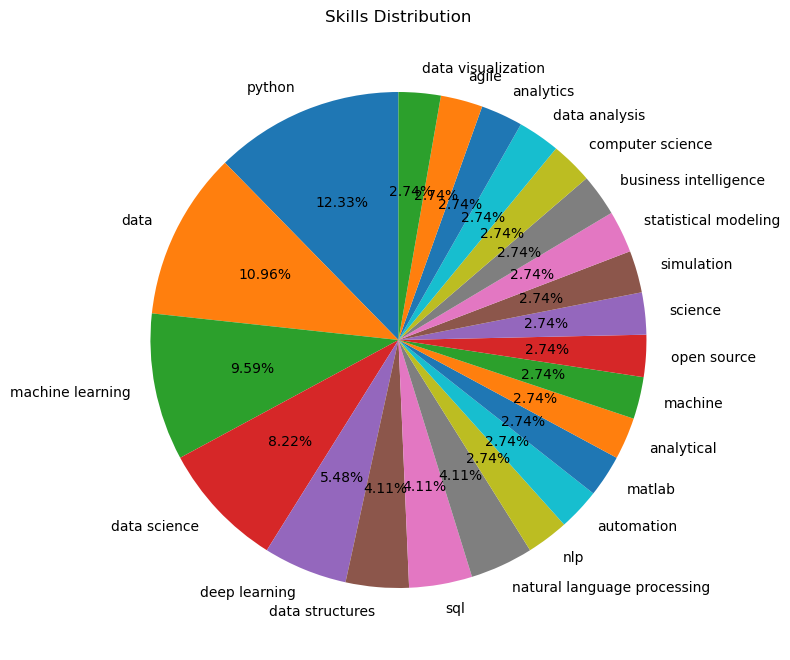

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,60))

counts = filtered_skills['Count']
labels = filtered_skills['Skill']

plt.pie(counts, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title("Skills Distribution" )

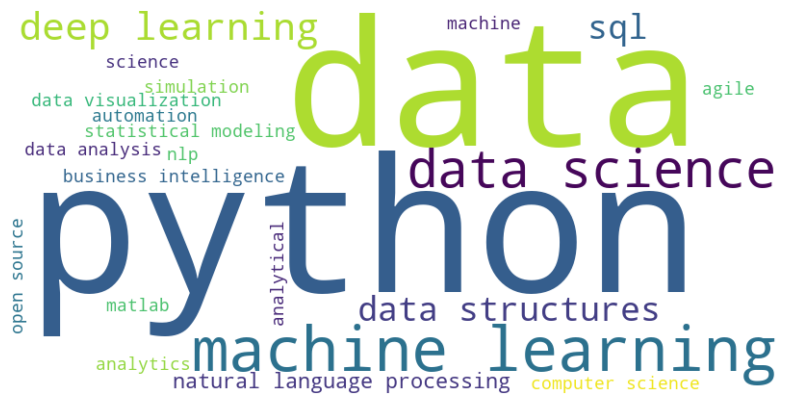

In [21]:
from wordcloud import WordCloud

wordcloud_data = dict(zip(filtered_skills['Skill'], filtered_skills['Count']))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
df['Location'] = df['Location'].astype(str) 
location_lists = df['Location'].str.lower().str.split(',').apply(lambda x: [item.strip() for item in x])

flat_location_list = [item for sublist in location_lists for item in sublist]

location_counts = Counter(flat_location_list)

standardized_location_list = [location.replace(' ', '') for location in flat_location_list if location]

standardized_location_counts = Counter(standardized_location_list)
location_df = pd.DataFrame(list(standardized_location_counts.items()), columns=['Location', 'Count'])
display(location_df.sort_values(by='Count', ascending = False, ignore_index = True))

,Location,Count
0,bangalore/bengaluru,300
1,pune,140
2,mumbai,100
3,chennai,80
4,kolkata,60
5,newdelhi,60
6,hyderabad/secunderabad,60
7,karnataka,60
8,gurgaon/gurugram,40
9,bengaluru,40


In [23]:
threshold = 20
filtered_loc = location_df[location_df['Count'] > threshold]
display(filtered_loc)

,Location,Count
0,mumbai,100
1,pune,140
2,chennai,80
3,gurgaon/gurugram,40
4,bangalore/bengaluru,300
5,kolkata,60
6,newdelhi,60
7,hyderabad/secunderabad,60
8,bengaluru,40
11,karnataka,60


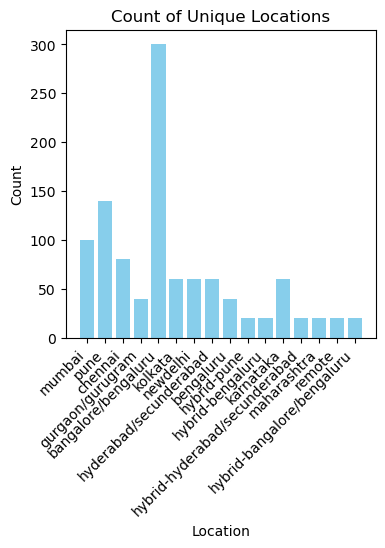

In [24]:
plt.figure(figsize=(4, 4))
plt.bar(x=location_df['Location'], height=location_df['Count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of Unique Locations')
plt.show()

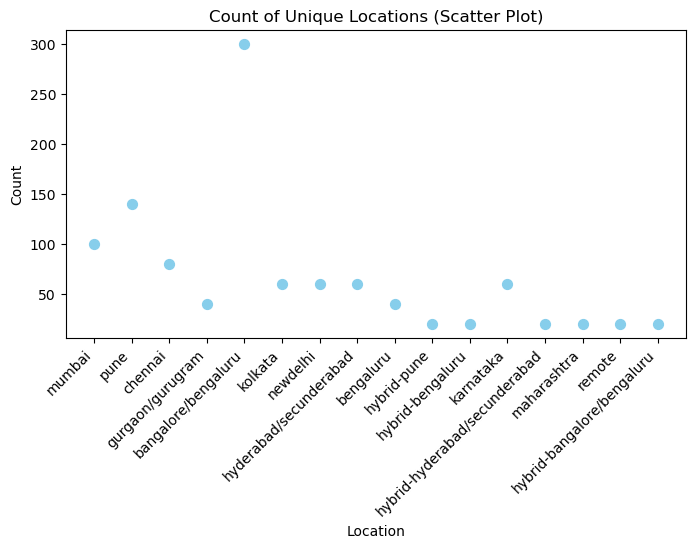

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.scatter(x=location_df['Location'], y=location_df['Count'], color='skyblue', s=50)  # s is marker size
plt.xticks(rotation=45, ha='right')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of Unique Locations (Scatter Plot)')
plt.show()

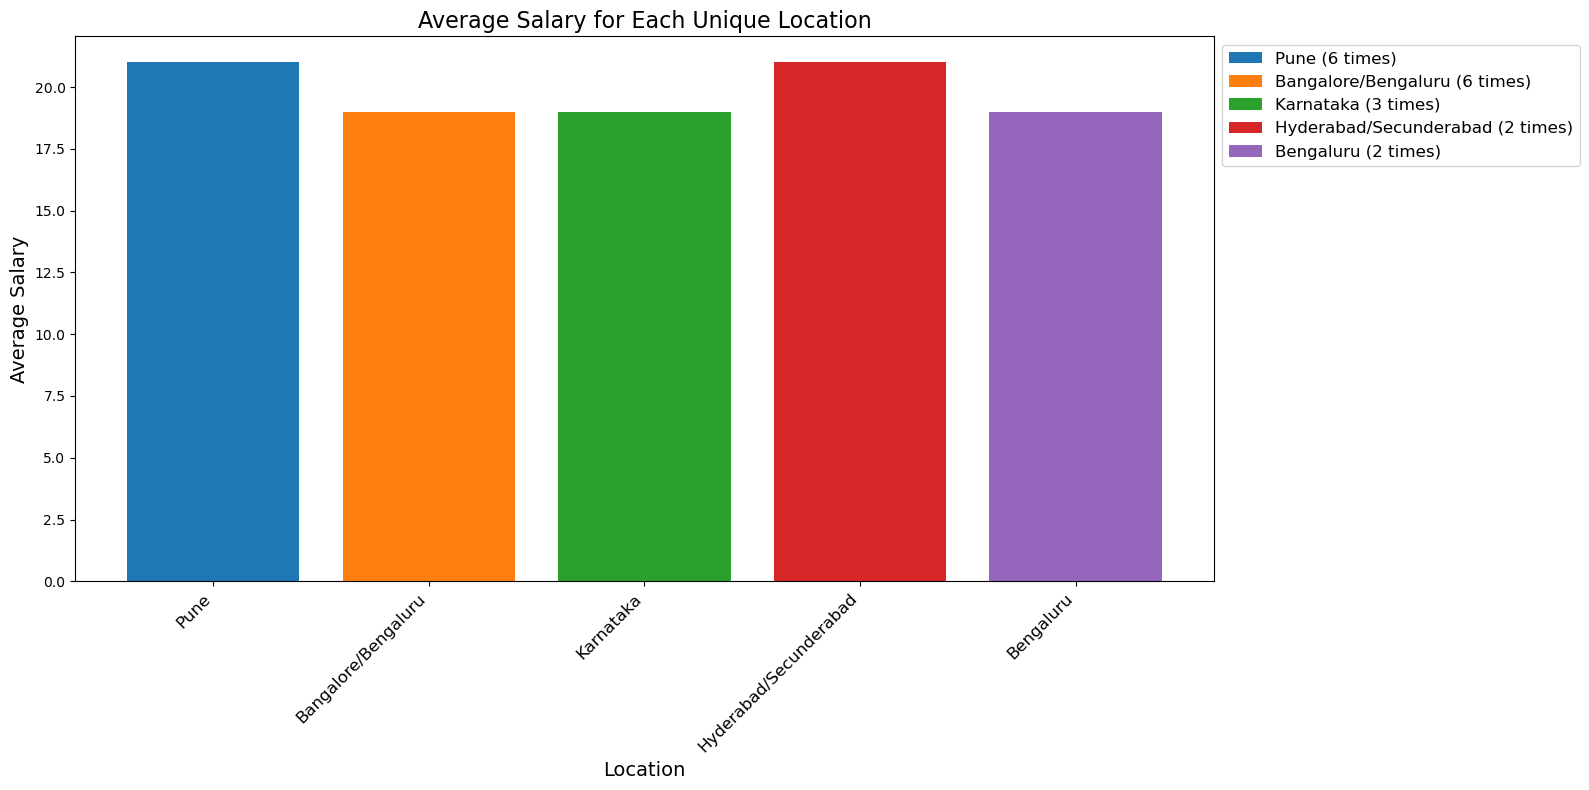

In [42]:
df['Location'] = df['Location'].fillna('')

my_data_frame = df.drop_duplicates(subset=['Location']).copy()

legend_mapping = {'Hybrid - Chennai': 'Chennai', 'Hybrid - Pune': 'Pune', 'Bangalore/ Bengaluru': 'Bangalore/Bengaluru', 'Hyderabad/ Secunderabad': 'Hyderabad/Secunderabad', 'Hybrid - Hyderabad/Secunderabad': 'Hyderabad/Secunderabad'}

my_data_frame['Location'] = my_data_frame['Location'].replace(legend_mapping, regex=True)

locations_df = my_data_frame['Location'].str.split(', ', expand=True)


melted_df = pd.melt(locations_df, value_name='Location').dropna()['Location']
counts = melted_df.value_counts()

top_n = 10

plt.figure(figsize=(16, 8))
for location, count in counts.head(top_n).items():
    subset = my_data_frame[my_data_frame['Location'].str.contains(location, case=False, na=False)]
    average_salary = subset['Average Salary'].mean()
    if not pd.isna(average_salary):
        plt.bar(location, average_salary, label=f'{location} ({count} times)')

plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)
plt.title(f'Average Salary for Each Unique Location', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)

if counts.notnull().any():
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()


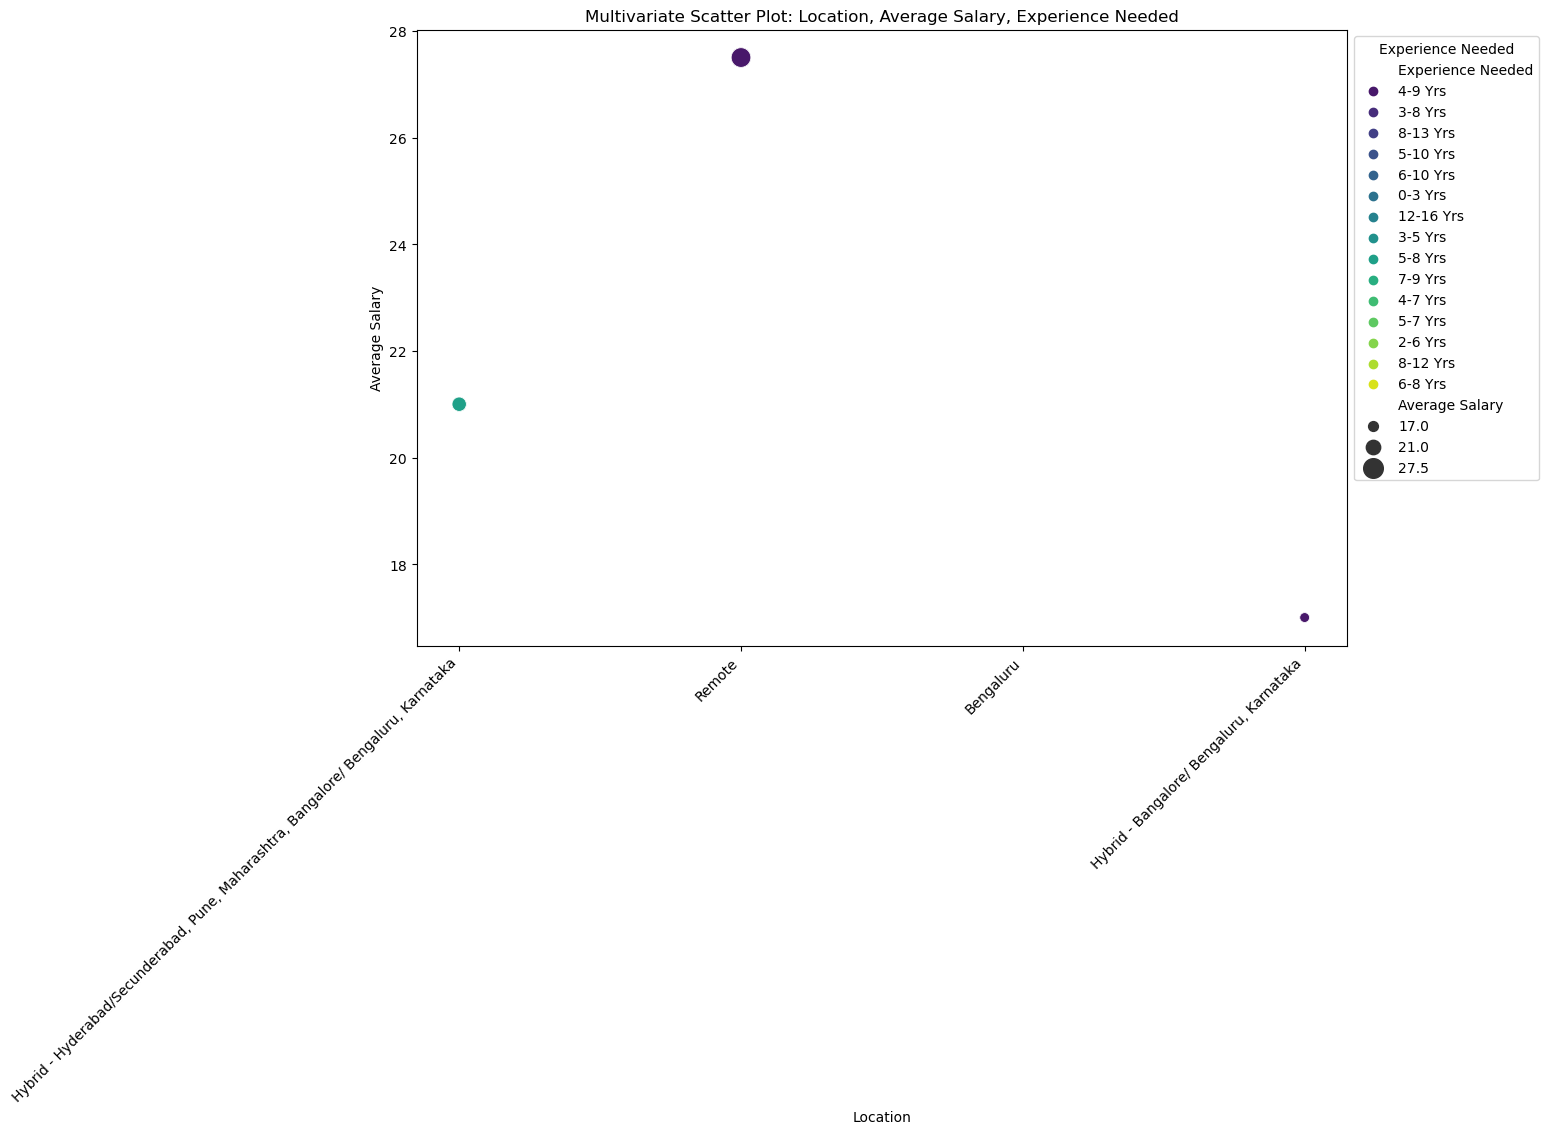

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded from the CSV file

# Handle NaN values and convert 'Average Salary' to numeric
df[['Location', 'Average Salary', 'Experience Needed']] = df[['Location', 'Average Salary', 'Experience Needed']].fillna('')
df['Average Salary'] = pd.to_numeric(df['Average Salary'], errors='coerce')

# Create a scatter plot with color-coded markers for different experience levels
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Location', y='Average Salary', hue='Experience Needed', size='Average Salary', data=df, palette='viridis', sizes=(50, 200))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.title('Multivariate Scatter Plot: Location, Average Salary, Experience Needed')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Experience Needed')
plt.show()

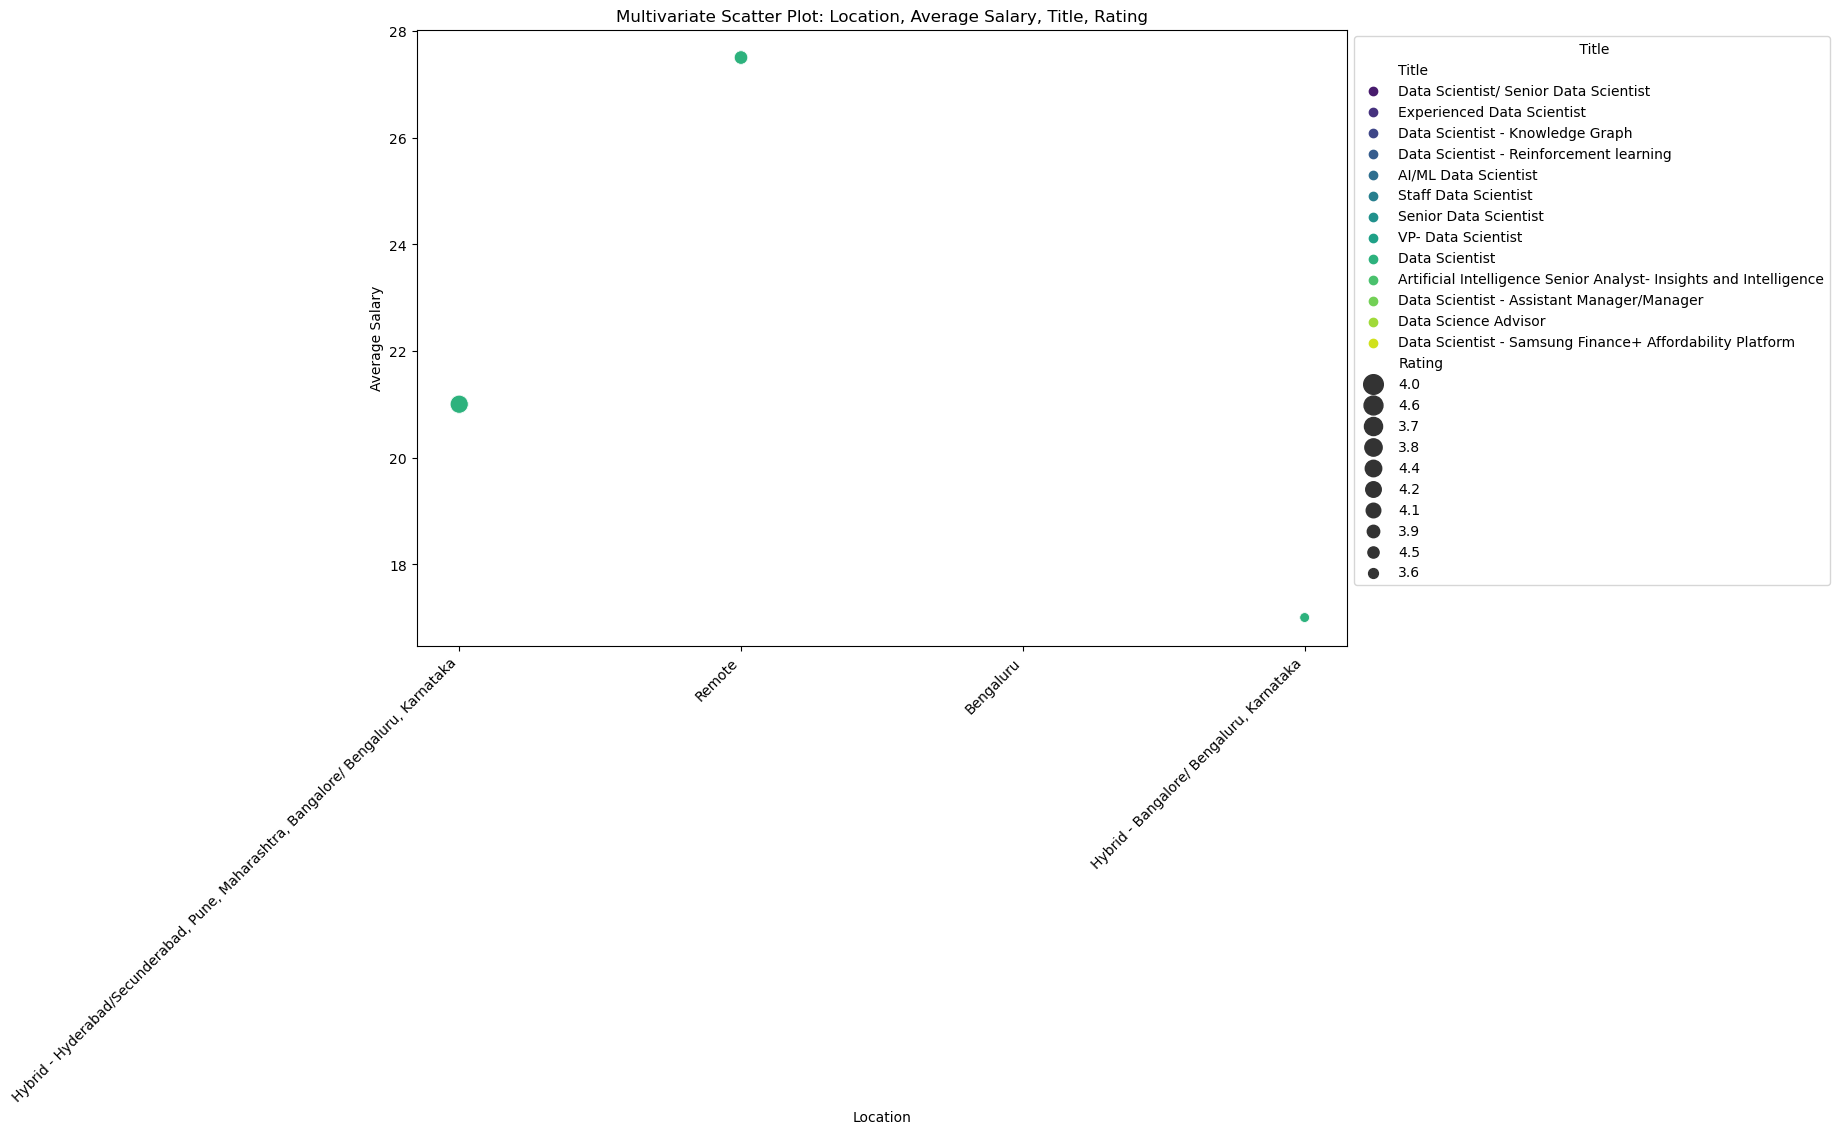

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded from the CSV file

# Handle NaN values and convert 'Average Salary' to numeric
df[['Title', 'Location', 'Rating', 'Average Salary']] = df[['Title', 'Location', 'Rating', 'Average Salary']].fillna('')
df['Average Salary'] = pd.to_numeric(df['Average Salary'], errors='coerce')

# Create a scatter plot with color-coded markers for different position titles
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Location', y='Average Salary', hue='Title', size='Rating', data=df, palette='viridis', sizes=(50, 200))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.title('Multivariate Scatter Plot: Location, Average Salary, Title, Rating')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title=' Title')
plt.show()



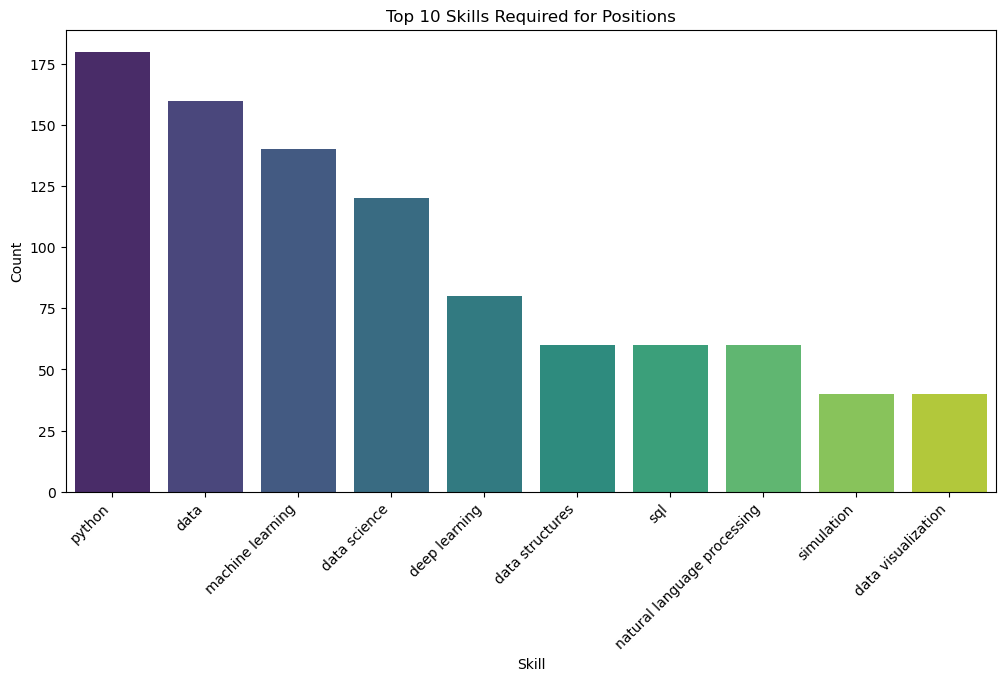

In [33]:
# Assuming df_skills is the DataFrame with skill counts (as calculated in your first code snippet)

# Sort skills DataFrame by count
df_skills = df_skills.sort_values(by='Count', ascending=False, ignore_index=True)

# Plot the top N skills
top_n_skills = 10
plt.figure(figsize=(12, 6))
sns.barplot(x='Skill', y='Count', data=df_skills.head(top_n_skills), palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.title(f'Top {top_n_skills} Skills Required for Positions')
plt.show()


In [46]:
import matplotlib.pyplot as plt

# Assuming salary_df is your DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(x=salary_df['Location'], y=salary_df['AverageSalary'], c='skyblue', s=50, label='Average Salary')
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.title('Scatter Plot of Location vs Average Salary')

# Adding company information with different marker style
unique_companies = salary_df['Company'].unique()
for company in unique_companies:
    company_data = salary_df[salary_df['Company'] == company]
    plt.scatter(x=company_data['Location'], y=company_data['AverageSalary'], s=50, label=company)

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


NameError: name 'salary_df' is not defined

<Figure size 1000x600 with 0 Axes>

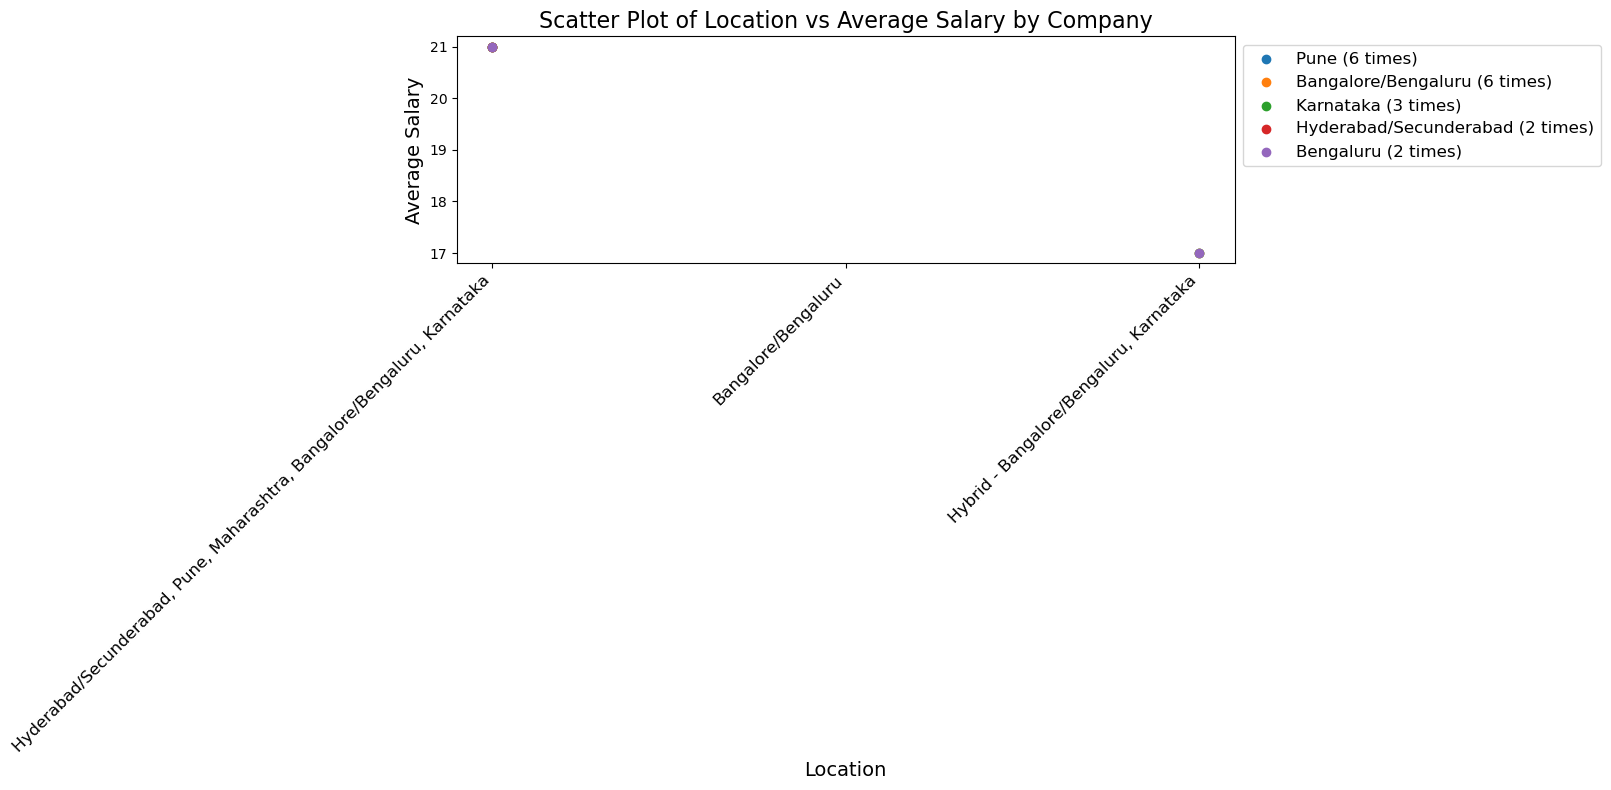

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Location', 'Average Salary', and 'Company' columns

df['Location'] = df['Location'].fillna('')

my_data_frame = df.drop_duplicates(subset=['Location']).copy()

legend_mapping = {'Hybrid - Chennai': 'Chennai', 'Hybrid - Pune': 'Pune', 'Bangalore/ Bengaluru': 'Bangalore/Bengaluru',
                  'Hyderabad/ Secunderabad': 'Hyderabad/Secunderabad',
                  'Hybrid - Hyderabad/Secunderabad': 'Hyderabad/Secunderabad'}

my_data_frame['Location'] = my_data_frame['Location'].replace(legend_mapping, regex=True)

locations_df = my_data_frame['Location'].str.split(', ', expand=True)

melted_df = pd.melt(locations_df, value_name='Location').dropna()['Location']
counts = melted_df.value_counts()

top_n = 10

plt.figure(figsize=(16, 8))
for location, count in counts.head(top_n).items():
    subset = my_data_frame[my_data_frame['Location'].str.contains(location, case=False, na=False)]
    average_salary = subset['Average Salary'].mean()
    if not pd.isna(average_salary):
        plt.scatter(subset['Location'], subset['Average Salary'], label=f'{location} ({count} times)')

plt.xlabel('Location', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)
plt.title(f'Scatter Plot of Location vs Average Salary by Company', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)

if counts.notnull().any():
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()
